Given by The Sparks Foundation For the Data Science and Buisness Analysis Internship



By Roshani Thapa
roshnithapaa@gmail.com

The task  is to create the decision tree classifier and visualize it graphically.The purpose of this is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

#import

In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score , roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#loading The Dataset 

df= pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Viewing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Shape of the dataset
df.shape

(150, 6)

In [6]:
#Describing the dataset with basic statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Outlier Treatment

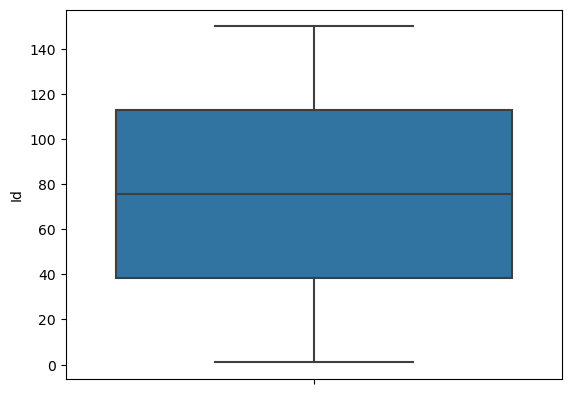

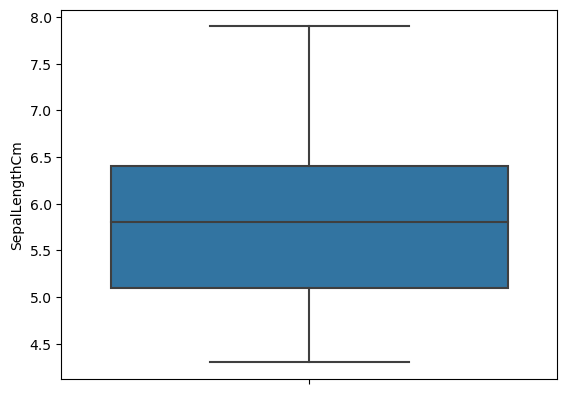

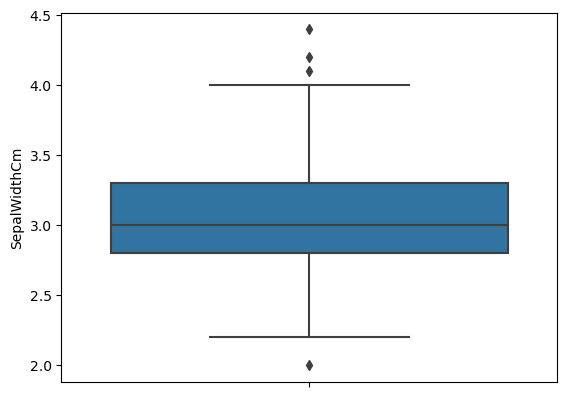

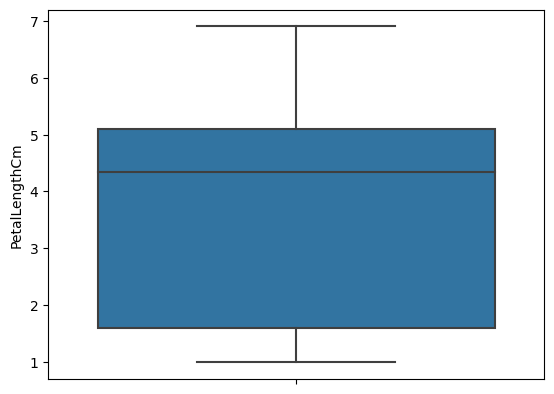

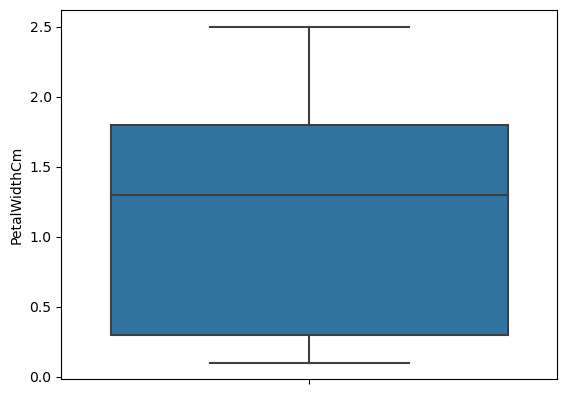

In [7]:
cols= df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

## Insights

🔑 from the boxplots, we can see that there are some outliers in the SepalWidthCm variable

Thus,We need to remove these outliers beforing training the model

In [8]:
#remove outliers from 'Sepal_width(cm)'
q1= df['SepalWidthCm'].quantile(0.25)
q3= df['SepalWidthCm'].quantile(0.75)
IQR= q3 - q1
df= df[(df['SepalWidthCm'] >= q1-1.5*IQR) & (df['SepalWidthCm']<= q3+1.5*IQR)]

In [9]:
#findout the shape after treatment
df.shape

(146, 6)

## SepalWidthCm after Outlier Treatment

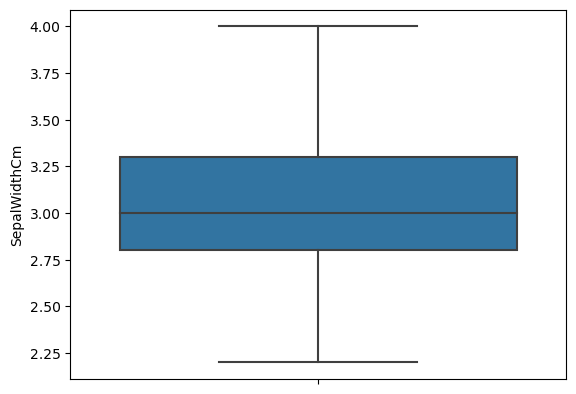

In [10]:
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

We can see there are no presence of outliers.Hence, we are ready to train our dataset

## Independent and Dependent Variable

In [11]:
X= df.drop(['Species','Id'],axis=1)
y= df['Species']

## Test-Train-Split the dataset

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state= 1)

## Model Building

In [13]:
DecisionTree= DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)
DecisionTree.fit(X,y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

## Plotting the decision tree

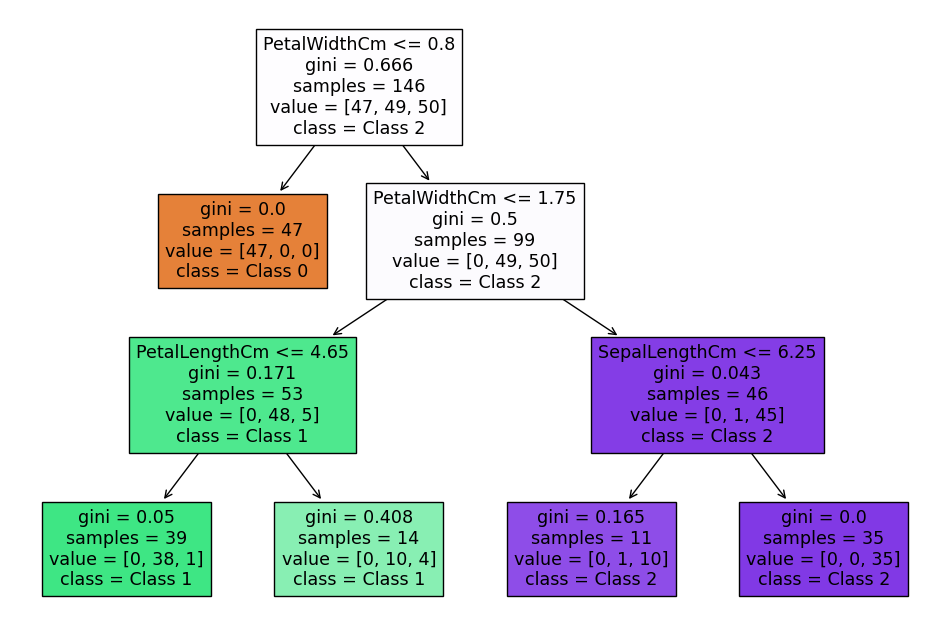

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8))
plot_tree(DecisionTree, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [15]:
!pip install pydotplus




Defaulting to user installation because normal site-packages is not writeable


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


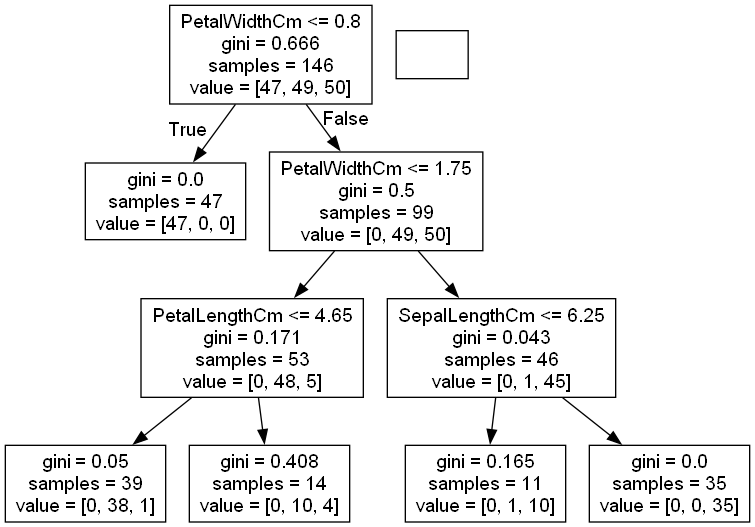

In [16]:
#plotting the decision tree
from IPython.display import Image
from sklearn.tree import export_graphviz

import pydotplus

features = X.columns
dot_data = export_graphviz(DecisionTree,out_file = None,feature_names = features)
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
# Defining an object for DTC and fiting for train dataset

dt= DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_pred_train= dt.predict(X_train)
y_pred= dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

## Model Evaluation Before Hyperparameter Tuning

In [19]:
print('Accuracy of Decision Tree Train; ',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree-Test: ',accuracy_score(y_pred,y_test))

Accuracy of Decision Tree Train;  1.0
Accuracy of Decision Tree-Test:  0.9545454545454546


## Classification for test

In [20]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



## Hyperparameter Tuning using GridSearchCV

In [21]:
dt= DecisionTreeClassifier(random_state=1)
params={'max_depth':[2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt,param_grid=params,cv=3)
gsearch.fit(X,y)
gsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [22]:
dt= DecisionTreeClassifier(**gsearch.best_params_,random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob= dt.predict_proba(X_test)[:,1]

## Model Evaluation after Hyperparameter Tuning

In [24]:
print('Confuison Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confuison Matrix - Train: 
 [[32  0  0]
 [ 0 33  1]
 [ 0  0 36]]

 Confusion Matrix - Test: 
 [[15  0  0]
 [ 0 13  2]
 [ 0  0 14]]


In [25]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44

